<a href="https://colab.research.google.com/github/thanhtruongphan/HomeworkAI/blob/main/HW_FuzzyLogic_1_Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Họ tên sinh viên : Phan Thanh Trường**
## **Mã số sinh viên : 19146293**
## **Bài tập về nhà Fuzzylogic - Rainfall**

## **1. Bài tập 'Rainfall'**

In [ ]:
!pip install scikit-fuzzy

import numpy as np 
import skfuzzy as fuzzy 
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=37041425453ca214ded47327dd82c33a45f3dda954fc8cdcf1aaa7932e19a5ff
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
temp = ctrl.Antecedent(np.arange(20.4,41.3,0.1),'Temp')
wind = ctrl.Antecedent(np.arange(0.7,3.2,0.1),'Wind')
rainfall = ctrl.Consequent(np.arange(0.2,9.2,0.1),'Rainfall')

temp['VL'] = fuzzy.trapmf(temp.universe,[20.4,20.4,21.0,25.6])
temp['L'] = fuzzy.trimf(temp.universe,[21.0,25.6,30.8])
temp['N'] = fuzzy.trimf(temp.universe,[25.6,30.8,36.0])
temp['H'] = fuzzy.trimf(temp.universe,[30.8,36.0,39.8])
temp['VH'] = fuzzy.trapmf(temp.universe,[36.0,39.8,41.2,41.2])

wind['VL'] = fuzzy.trapmf(wind.universe,[0.7,0.7,0.9,1.3])
wind['L'] = fuzzy.trimf(wind.universe,[0.9,1.3,1.9])
wind['N'] = fuzzy.trimf(wind.universe,[1.3,1.9,2.5])
wind['H'] = fuzzy.trimf(wind.universe,[1.9,2.5,2.9])
wind['VH'] = fuzzy.trapmf(wind.universe,[2.5,2.9,3.1,3.1])

rainfall['VL'] = fuzzy.trimf(rainfall.universe,[0.2,1.0,1.7])
rainfall['L'] = fuzzy.trimf(rainfall.universe,[1.0,2.0,3.3])
rainfall['N'] = fuzzy.trimf(rainfall.universe,[2.4,3.7,4.9])
rainfall['H'] = fuzzy.trimf(rainfall.universe,[3.7,5.5,6.7])
rainfall['VH'] = fuzzy.trimf(rainfall.universe,[5.5,7.5,9.1])


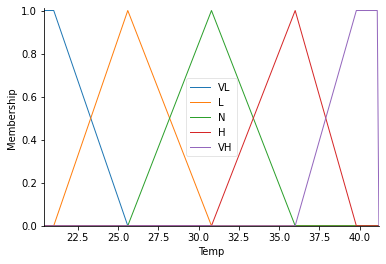

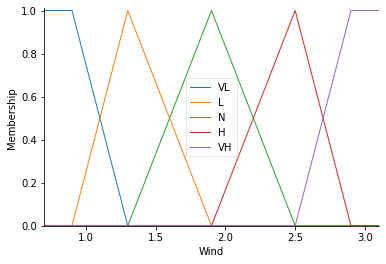

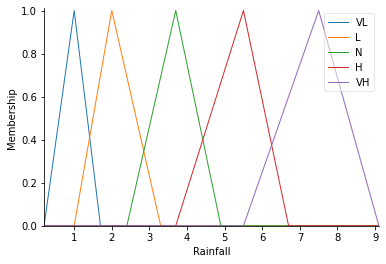

In [ ]:
rule1 = ctrl.Rule(temp['VL']&wind['VL'],rainfall['VL'])
rule2 = ctrl.Rule(temp['VL']&wind['L'],rainfall['VL'])
rule3 = ctrl.Rule(temp['VL']&wind['N'],rainfall['L'])
rule4 = ctrl.Rule(temp['VL']&wind['H'],rainfall['L'])
rule5 = ctrl.Rule(temp['VL']&wind['VH'],rainfall['L'])

rule6 = ctrl.Rule(temp['L']&wind['VL'],rainfall['VL'])
rule7 = ctrl.Rule(temp['L']&wind['L'],rainfall['VL'])
rule8 = ctrl.Rule(temp['L']&wind['N'],rainfall['L'])
rule9 = ctrl.Rule(temp['L']&wind['H'],rainfall['N'])
rule10 = ctrl.Rule(temp['L']&wind['VH'],rainfall['N'])

rule11 = ctrl.Rule(temp['N']&wind['VL'],rainfall['L'])
rule12 = ctrl.Rule(temp['N']&wind['L'],rainfall['L'])
rule13 = ctrl.Rule(temp['N']&wind['N'],rainfall['N'])
rule14 = ctrl.Rule(temp['N']&wind['H'],rainfall['H'])
rule15 = ctrl.Rule(temp['N']&wind['VH'],rainfall['H'])

rule16 = ctrl.Rule(temp['H']&wind['VL'],rainfall['L'])
rule17 = ctrl.Rule(temp['H']&wind['L'],rainfall['N'])
rule18 = ctrl.Rule(temp['H']&wind['N'],rainfall['H'])
rule19 = ctrl.Rule(temp['H']&wind['H'],rainfall['VH'])
rule20 = ctrl.Rule(temp['H']&wind['VH'],rainfall['VH'])

rule21 = ctrl.Rule(temp['VH']&wind['VL'],rainfall['L'])
rule22 = ctrl.Rule(temp['VH']&wind['L'],rainfall['N'])
rule23 = ctrl.Rule(temp['VH']&wind['N'],rainfall['H'])
rule24 = ctrl.Rule(temp['VH']&wind['H'],rainfall['VH'])
rule25 = ctrl.Rule(temp['VH']&wind['VH'],rainfall['VH'])
temp.view()
wind.view()
rainfall.view()


7.299992236934701


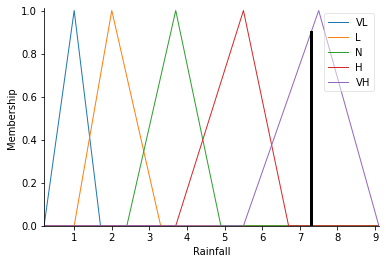

In [ ]:
rainfalling_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['Temp'] = 41.2
rainfalling.input['Wind'] = 3.1
rainfalling.compute()
print(rainfalling.output['Rainfall'])
rainfall.view(sim=rainfalling)